In [1]:
## Most Important
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pathlib import Path
from PIL import Image

## less Important
from functools import partial
import os
from scipy import stats
import missingno as msno
import joblib
import tarfile
import shutil
import urllib

## Sklearn
from sklearn import datasets
## Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
## Metrics
from sklearn.metrics import accuracy_score

## tensorflow & Keras
import tensorflow as tf    ## i will use tf for every thing and for keras using tf.keras

## Loading the Data and Look at the Big Picture

`Only for training here`

In [2]:
train_labels = pd.read_csv('../input/arabic-hwr-ai-pro-intake1/train.csv')
train_images = Path(r'../input/arabic-hwr-ai-pro-intake1/train')

## read these all training images paths as Series
train_images_paths = pd.Series(sorted(list(train_images.glob(r'*.png'))), name='Filepath').astype(str)

train_images_paths.head()

0    ../input/arabic-hwr-ai-pro-intake1/train/00000...
1    ../input/arabic-hwr-ai-pro-intake1/train/00001...
2    ../input/arabic-hwr-ai-pro-intake1/train/00002...
3    ../input/arabic-hwr-ai-pro-intake1/train/00003...
4    ../input/arabic-hwr-ai-pro-intake1/train/00004...
Name: Filepath, dtype: object

## Explore the Data

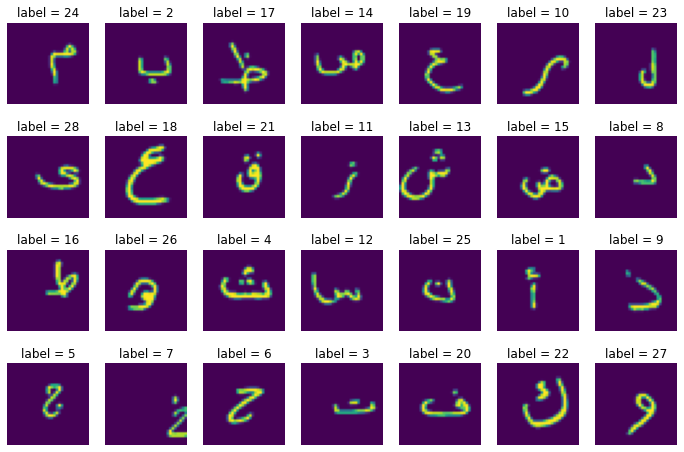

In [3]:
img_key_value = {}
for value in train_labels['label'].unique():
    img_key_value[value] = train_labels[train_labels['label']==value].index[0]
    
img_index = list(img_key_value.values())
img_label = list(img_key_value.keys())

fig, ax = plt.subplots(4, 7, figsize=(12, 8))

i = 0
for row in range(4):
    for col in range(7):
        plt.sca(ax[row, col])
        plt.title(f'label = {img_label[i]}')
        img = plt.imread(train_images_paths.iloc[img_index[i]])
        plt.imshow(img)
        plt.axis('off')
        i+=1

In [4]:
print('Number of Instances in train_set =>', len(train_images_paths))
print('Number of Instances in train_labels =>', len(train_labels))

print()

img = plt.imread(train_images_paths.iloc[img_index[0]])
print('shape of each Image is =>', img.shape)

Number of Instances in train_set => 13440
Number of Instances in train_labels => 13440

shape of each Image is => (32, 32, 4)


## Data Preprocessing

In [5]:
train_full_labels = train_labels['label'].values
train_full_set = np.empty((13440, 32, 32, 3), dtype=np.float32)  #take only the first 3 channels

for idx, path in enumerate(train_images_paths):
    img = plt.imread(path)
    img = img[:,:,:3]
    train_full_set[idx] = img
    
print('train_full_set.shape =>', train_full_set.shape)
print('train_full_labels.shape =>', train_full_labels.shape)

train_full_set.shape => (13440, 32, 32, 3)
train_full_labels.shape => (13440,)


## Split the Data

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(train_full_set, train_full_labels, 
                                                      test_size=0.2, shuffle=True, random_state=42)

print('X_train.shape =>', X_train.shape)
print('X_valid.shape =>', X_valid.shape)
print('y_train.shape =>', y_train.shape)
print('y_valid.shape =>', y_valid.shape)

X_train.shape => (10752, 32, 32, 3)
X_valid.shape => (2688, 32, 32, 3)
y_train.shape => (10752,)
y_valid.shape => (2688,)


## Model Training

In [7]:
def create_model2(activation='relu', optimizer='adam', kernel_initializer='uniform'):
    model = Sequential()

    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                     activation ='relu', input_shape = (32,32,3)))
    
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(29, activation = "softmax"))
    
#     model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    model.compile(loss='sparse_categorical_crossentropy', 
                      metrics=['accuracy'], 
                      optimizer=tf.keras.optimizers.Nadam(learning_rate=0.01))
        
    return model


In [8]:
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [9]:
model = create_model2(kernel_initializer='he_uniform', activation='relu', optimizer='Nadam');


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopp = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

checkpoint = tf.keras.callbacks.ModelCheckpoint("weights.hdf5",
                                                 monitor='val_accuracy',
                                                 verbose=1,
                                                 save_best_only=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                  factor=0.5,
                                                  patience=4,
                                                  min_lr=0.00005,
                                                  verbose=1)

In [12]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
aug = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1)

gen_train = aug.flow(X_train, y_train, batch_size=64)

gen_val = aug.flow(X_valid, y_valid, batch_size=64)

In [13]:
history = model.fit(gen_train, validation_data=gen_val, 
                    epochs=100, batch_size=512, callbacks=[checkpoint, reduce_lr])

2021-11-07 17:43:00.475148: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
168/168 [==============================] - 36s 208ms/step - loss: 2.7808 - accuracy: 0.1578 - val_loss: 1.7206 - val_accuracy: 0.4416

Epoch 00001: val_accuracy improved from -inf to 0.44159, saving model to weights.hdf5
Epoch 2/100
168/168 [==============================] - 35s 205ms/step - loss: 1.4877 - accuracy: 0.4928 - val_loss: 0.8957 - val_accuracy: 0.6957

Epoch 00002: val_accuracy improved from 0.44159 to 0.69568, saving model to weights.hdf5
Epoch 3/100
168/168 [==============================] - 34s 205ms/step - loss: 0.9513 - accuracy: 0.6728 - val_loss: 0.5665 - val_accuracy: 0.8103

Epoch 00003: val_accuracy improved from 0.69568 to 0.81027, saving model to weights.hdf5
Epoch 4/100
168/168 [==============================] - 34s 205ms/step - loss: 0.7119 - accuracy: 0.7546 - val_loss: 0.4227 - val_accuracy: 0.8650

Epoch 00004: val_accuracy improved from 0.81027 to 0.86496, saving model to weights.hdf5
Epoch 5/100
168/168 [==============================] - 35s 

In [14]:
model.load_weights("weights.hdf5")

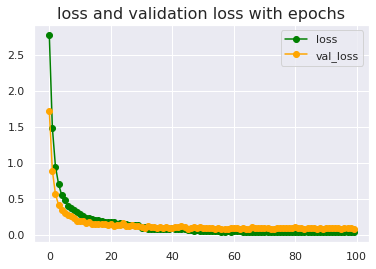

In [15]:

# plot loss function for train and validation.
sns.set()
plt.title('loss and validation loss with epochs', 
          fontsize=16)

plt.plot(history.history['loss'],
         marker='o',
         color="green",
         label="loss")

plt.plot(history.history['val_loss'],
         marker='o',
         color="orange", 
         label="val_loss")

plt.legend()

plt.show()

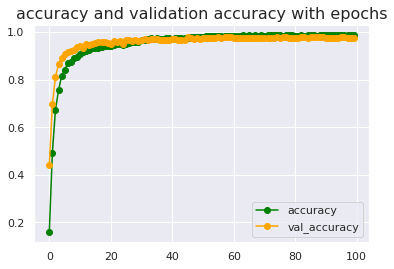

In [16]:
# plot accuracy for train and validation data.
plt.title('accuracy and validation accuracy with epochs',
          fontsize=16)

plt.plot(history.history['accuracy'],
         marker='o',
         color="green",
         label="accuracy")

plt.plot(history.history['val_accuracy'],
         marker='o',
         color="orange",
         label="val_accuracy")

plt.legend()
plt.show()

In [17]:
loss_all_data, acc_all_data = model.evaluate(train_full_set, train_full_labels, verbose=0)
print('loss_all_data =>', loss_all_data)
print('acc_all_data =>', acc_all_data)

loss_all_data => 0.01967890001833439
acc_all_data => 0.9947916865348816


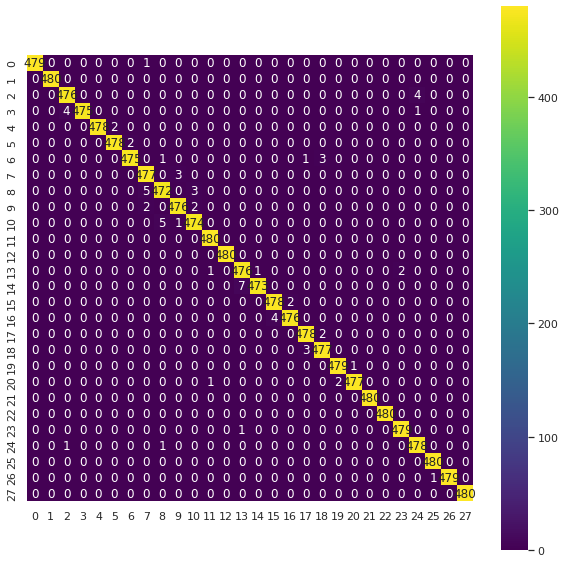

In [18]:
from sklearn.metrics import confusion_matrix
classes = np.argmax(model.predict(train_full_set), axis=-1)
cm = confusion_matrix(train_full_labels, classes)

plt.figure(figsize=(10,10))
sns.heatmap(cm, fmt='d', cmap='viridis', annot = True, square=True)
plt.show()

## Evaluation on Testing DataSet

In [19]:
test_labels = pd.read_csv('../input/arabic-hwr-ai-pro-intake1/test.csv')
test_images = Path(r'../input/arabic-hwr-ai-pro-intake1/test')

## read these all training images paths as Series
test_images_paths = pd.Series(sorted(list(test_images.glob(r'*.png'))), name='Filepath').astype(str)

test_images_paths.head()

0    ../input/arabic-hwr-ai-pro-intake1/test/00000.png
1    ../input/arabic-hwr-ai-pro-intake1/test/00001.png
2    ../input/arabic-hwr-ai-pro-intake1/test/00002.png
3    ../input/arabic-hwr-ai-pro-intake1/test/00003.png
4    ../input/arabic-hwr-ai-pro-intake1/test/00004.png
Name: Filepath, dtype: object

In [20]:
print('Number of Instances in test_set is', len(test_images_paths))

Number of Instances in test_set is 3360


In [21]:
test_full_set = np.empty((3360, 32, 32, 3), dtype=np.float32)  #take only the first 3 channels

for idx, path in enumerate(test_images_paths):
    img = plt.imread(path)
    img = img[:,:,:3]
    test_full_set[idx] = img
    
print('test_full_set.shape =>', test_full_set.shape)

test_full_set.shape => (3360, 32, 32, 3)


In [22]:
y_preds_classes = np.argmax(model.predict(test_full_set), axis=-1)

In [23]:
test_labels['label'] = y_preds_classes

In [24]:
test_labels

,id,label
0,0,26
1,1,10
2,2,1
3,3,10
4,4,15
...,...,...
3355,3355,16
3356,3356,6
3357,3357,4
3358,3358,11


In [25]:
test_labels[['id', 'label']].to_csv('/kaggle/working/submission.csv', index=False)

## Done :D